# Tugas Klasifikasi

Jury Maxwell 103132400023

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Import Dataset

In [2]:
heart = r"C:\Users\jmjur\Documents\IPSD\klasifikasi\heart_desease.xlsx"
df = pd.read_excel(heart)

df.columns = df.columns.str.strip()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_predicted
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


# EDA

In [3]:
df.dtypes

age                int64
sex                int64
cp                 int64
trestbps          object
chol              object
fbs               object
restecg           object
thalach           object
exang             object
oldpeak          float64
slope             object
ca                object
thal              object
num_predicted      int64
dtype: object

In [4]:
# Mengganti nilai '?' dengan NaN
df.replace('?', np.nan, inplace=True)
# Ubah tipe data kolom menjadi float agar bisa diolah secara statistik
df = df.apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            294 non-null    int64  
 1   sex            294 non-null    int64  
 2   cp             294 non-null    int64  
 3   trestbps       293 non-null    float64
 4   chol           271 non-null    float64
 5   fbs            286 non-null    float64
 6   restecg        293 non-null    float64
 7   thalach        293 non-null    float64
 8   exang          293 non-null    float64
 9   oldpeak        294 non-null    float64
 10  slope          104 non-null    float64
 11  ca             3 non-null      float64
 12  thal           28 non-null     float64
 13  num_predicted  294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


C:\Users\jmjur\AppData\Local\Temp\ipykernel_32584\71004113.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


In [5]:
df.isnull().sum()

age                0
sex                0
cp                 0
trestbps           1
chol              23
fbs                8
restecg            1
thalach            1
exang              1
oldpeak            0
slope            190
ca               291
thal             266
num_predicted      0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,294.0,47.826531,7.811812,28.0,42.00,49.0,54.0,66.0
sex,294.0,0.724490,0.447533,0.0,0.00,1.0,1.0,1.0
cp,294.0,2.982993,0.965117,1.0,2.00,3.0,4.0,4.0
trestbps,293.0,132.583618,17.626568,92.0,120.00,130.0,140.0,200.0
chol,271.0,250.848708,67.657711,85.0,209.00,243.0,282.5,603.0
fbs,286.0,0.069930,0.255476,0.0,0.00,0.0,0.0,1.0
restecg,293.0,0.218430,0.460868,0.0,0.00,0.0,0.0,2.0
thalach,293.0,139.129693,23.589749,82.0,122.00,140.0,155.0,190.0
exang,293.0,0.303754,0.460665,0.0,0.00,0.0,1.0,1.0
oldpeak,294.0,0.475713,0.867534,0.0,0.00,0.0,1.0,5.0


C:\Users\jmjur\AppData\Local\Temp\ipykernel_32584\3447079847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=target_col, data=df, palette='magma')


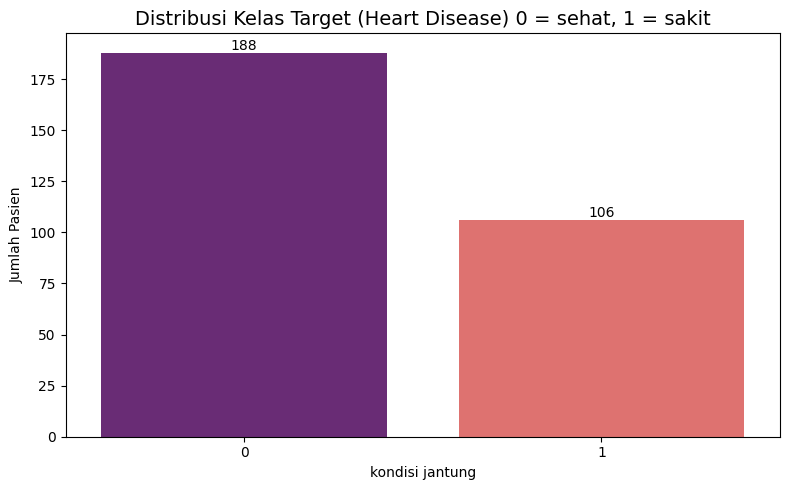

In [7]:
# Visualisasi distribusi target variable (num_predicted)
plt.figure(figsize=(8, 5))
target_col = 'num_predicted'
ax = sns.countplot(x=target_col, data=df, palette='magma')
plt.title('Distribusi Kelas Target (Heart Disease) 0 = sehat, 1 = sakit', fontsize=14)
plt.xlabel('kondisi jantung')
plt.ylabel('Jumlah Pasien')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

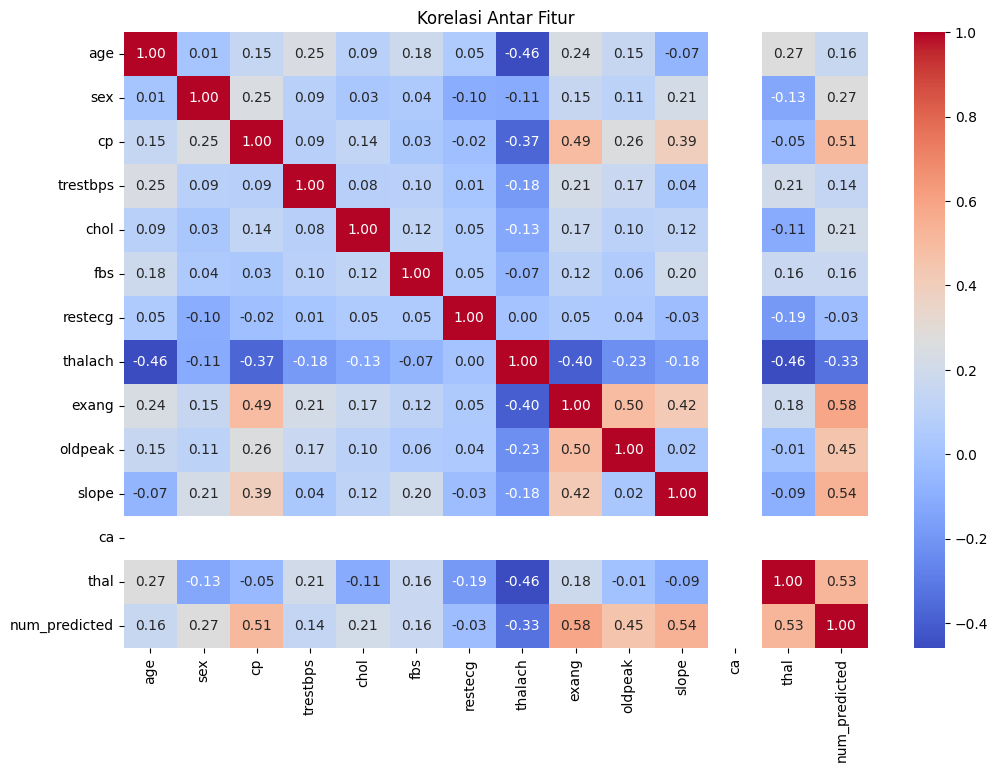

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

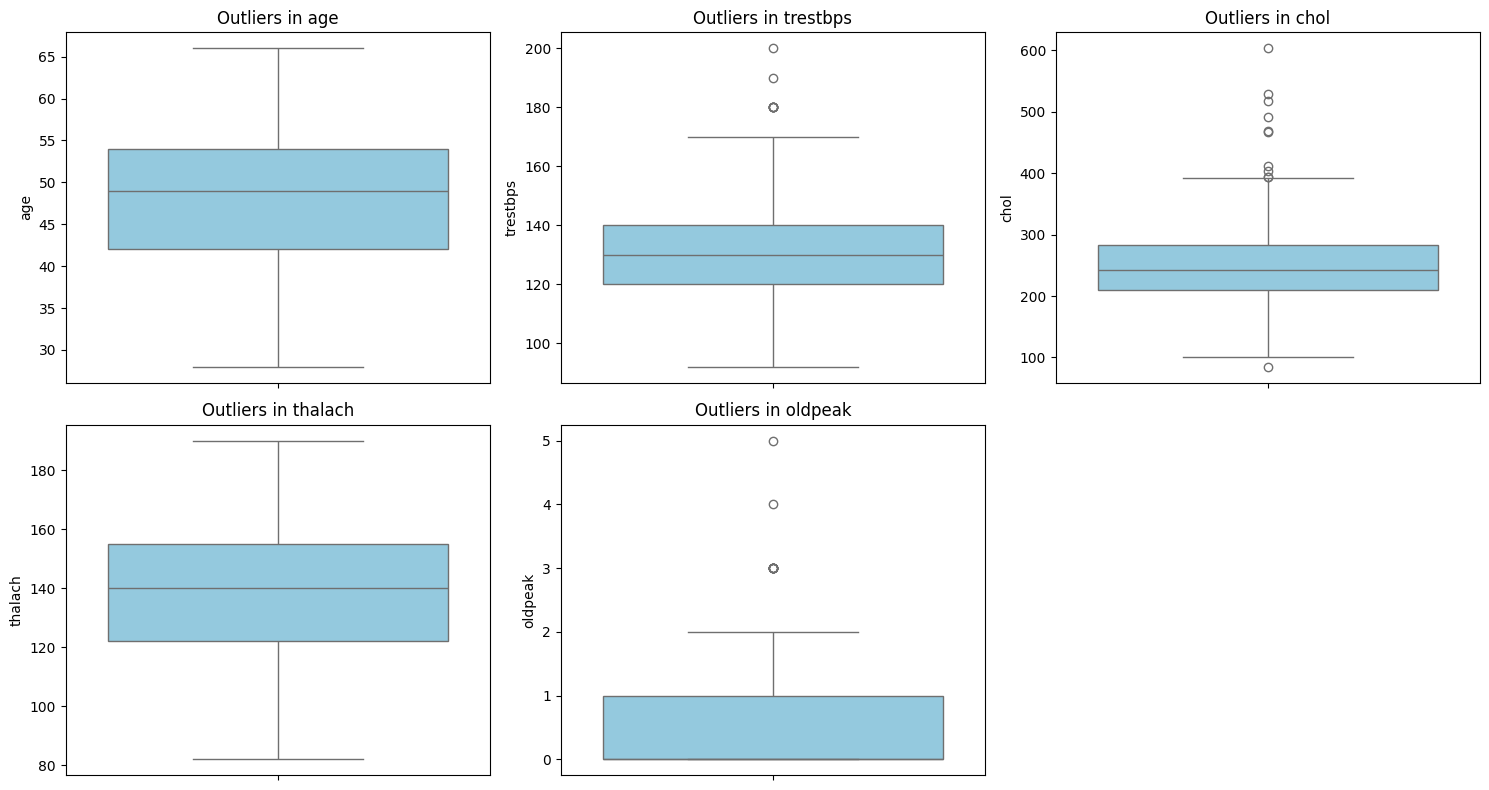

In [9]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

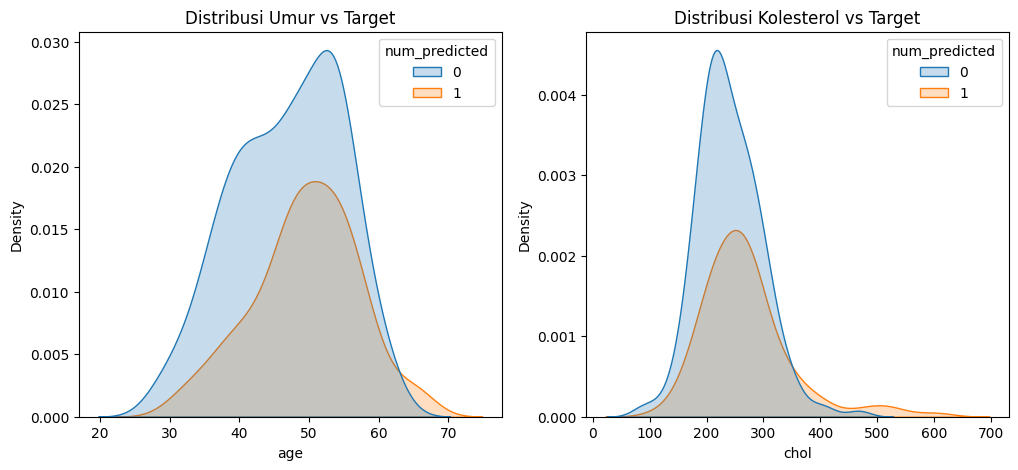

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='age', hue='num_predicted', fill=True)
plt.title('Distribusi Umur vs Target')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='chol', hue='num_predicted', fill=True)
plt.title('Distribusi Kolesterol vs Target')
plt.show()

# Preprocssing

In [11]:
# Buat copy dataframe untuk preprocessing
df_prep = df.copy()

# Ganti nilai "?" dengan NaN agar bisa diproses
df_prep = df_prep.replace('?', np.nan)

# Konversi semua kolom ke numeric 
for col in df_prep.columns:
    df_prep[col] = pd.to_numeric(df_prep[col], errors='coerce')

# Handle missing values dengan mengisi nilai median
for col in df_prep.columns:
    if df_prep[col].isnull().sum() > 0:
        df_prep[col].fillna(df_prep[col].median(), inplace=True)

print('Total missing values setelah handling:', df_prep.isnull().sum().sum())

Total missing values setelah handling: 0


In [12]:
# Pisahkan fitur (X) dan target (y)
X = df_prep.drop(columns=['num_predicted'])
y = df_prep['num_predicted']

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print('Data Training:', X_train.shape[0], 'samples')
print('Data Testing:', X_test.shape[0], 'samples')

Data Training: 235 samples
Data Testing: 59 samples


# Modeling

In [13]:
# List untuk menampung hasil perbandingan
all_results = []

def evaluate_model(model, name, X_test, y_test, cmap='Blues'):
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Hitung Metrik
    acc = round(accuracy_score(y_test, y_pred), 2)
    prec = round(precision_score(y_test, y_pred, average='weighted', zero_division=0), 2)
    rec = round(recall_score(y_test, y_pred, average='weighted', zero_division=0), 2)
    f1 = round(f1_score(y_test, y_pred, average='weighted', zero_division=0), 2)
    
    # Simpan ke list perbandingan
    all_results.append({'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1})
    
    # Visualisasi
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax[0])
    ax[0].set_title(f'Confusion Matrix: {name}')
    ax[0].set_xlabel('Prediksi')
    ax[0].set_ylabel('Aktual')
    
    # Bar Chart Metrik
    metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    metrics_val = [acc, prec, rec, f1]
    sns.barplot(x=metrics_name, y=metrics_val, palette='viridis', ax=ax[1])
    ax[1].set_ylim(0, 1)
    ax[1].set_title(f'Evaluation Metrics: {name}')
    for i, v in enumerate(metrics_val):
        ax[1].text(i, v + 0.02, f'{v:.2f}', ha='center')
        
    plt.tight_layout()
    plt.show()
    
    print(f"Hasil Klasifikasi {name}:\n")
    print(classification_report(y_test, y_pred))

## SVM (Support Vector Machine)

C:\Users\jmjur\AppData\Local\Temp\ipykernel_32584\2116788700.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_name, y=metrics_val, palette='viridis', ax=ax[1])


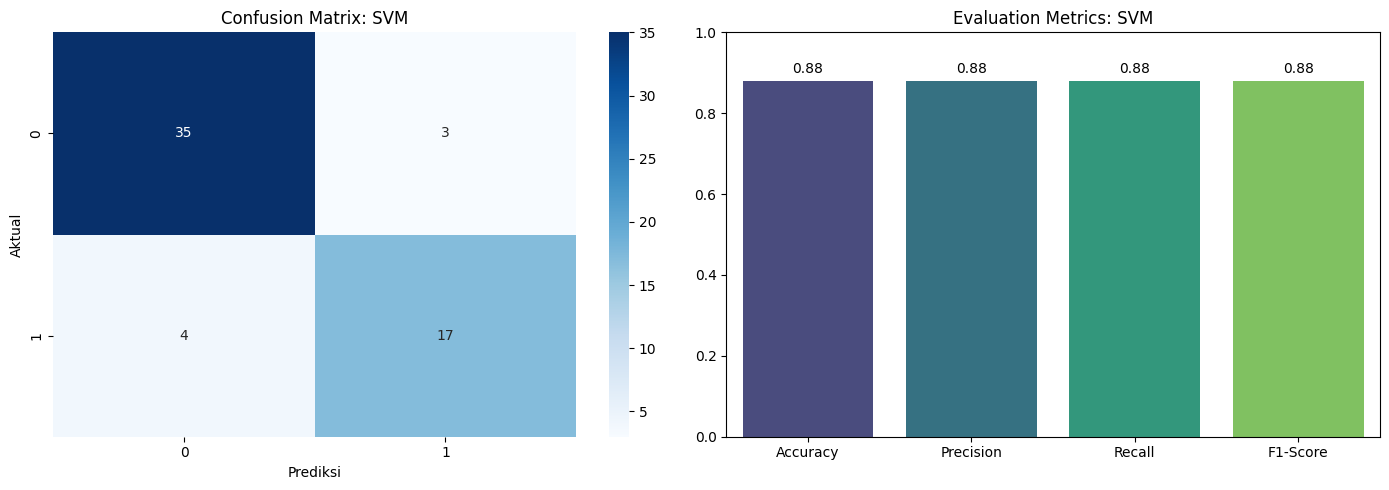

Hasil Klasifikasi SVM:

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.85      0.81      0.83        21

    accuracy                           0.88        59
   macro avg       0.87      0.87      0.87        59
weighted avg       0.88      0.88      0.88        59



In [14]:
# Training model SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluasi
evaluate_model(svm_model, 'SVM', X_test, y_test, cmap='Blues')

## Naive Bayes

C:\Users\jmjur\AppData\Local\Temp\ipykernel_32584\2116788700.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_name, y=metrics_val, palette='viridis', ax=ax[1])


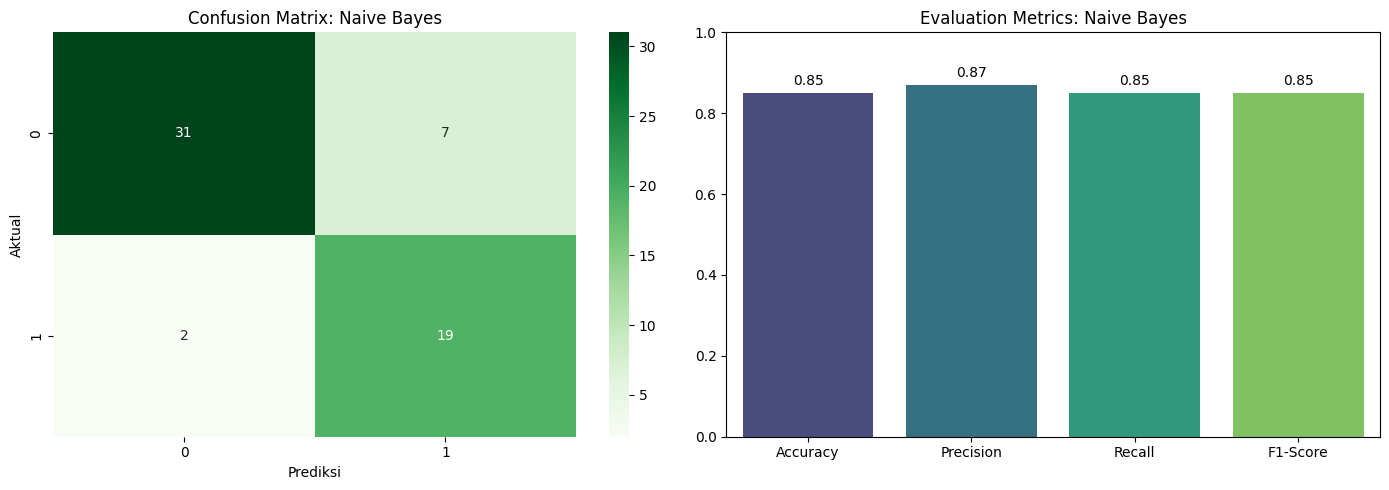

Hasil Klasifikasi Naive Bayes:

              precision    recall  f1-score   support

           0       0.94      0.82      0.87        38
           1       0.73      0.90      0.81        21

    accuracy                           0.85        59
   macro avg       0.84      0.86      0.84        59
weighted avg       0.87      0.85      0.85        59



In [15]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
evaluate_model(nb_model, 'Naive Bayes', X_test, y_test, cmap='Greens')

## ID3 Decision Tree

C:\Users\jmjur\AppData\Local\Temp\ipykernel_32584\2116788700.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_name, y=metrics_val, palette='viridis', ax=ax[1])


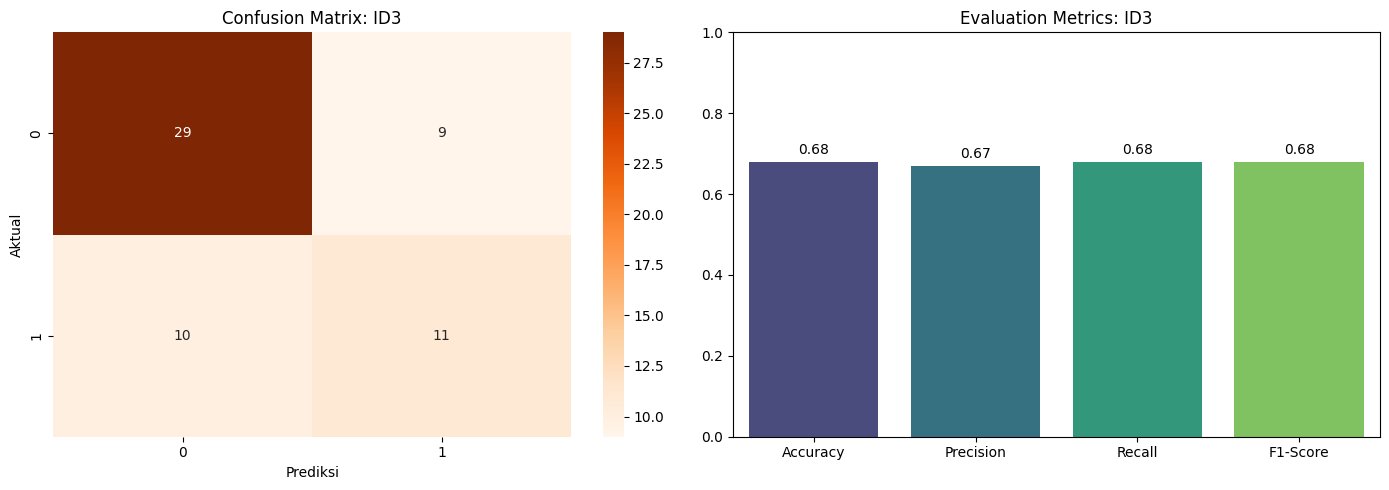

Hasil Klasifikasi ID3:

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.55      0.52      0.54        21

    accuracy                           0.68        59
   macro avg       0.65      0.64      0.64        59
weighted avg       0.67      0.68      0.68        59



In [16]:
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)
evaluate_model(id3_model, 'ID3', X_test, y_test, cmap='Oranges')

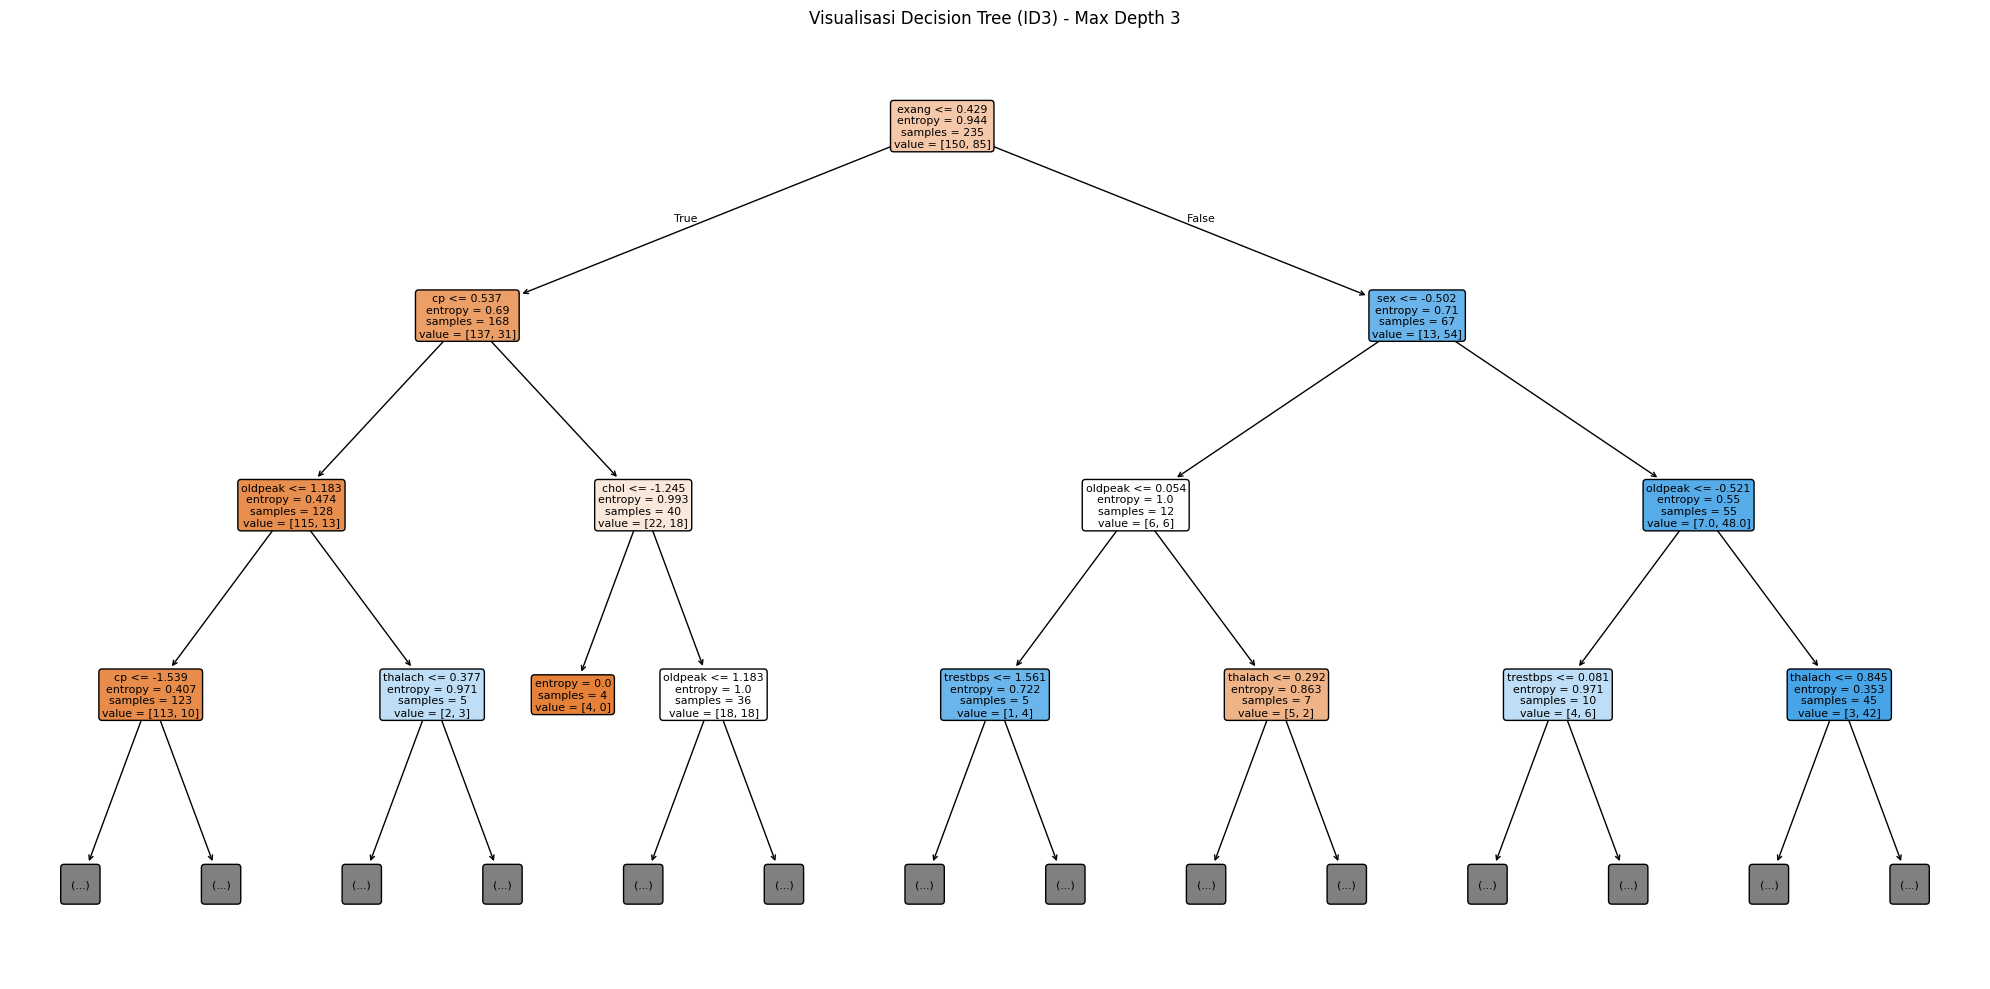

In [17]:
# Visualisasi Decision Tree ID3
plt.figure(figsize=(20, 10))
plot_tree(id3_model, feature_names=X.columns.tolist(), filled=True, rounded=True, max_depth=3)
plt.title('Visualisasi Decision Tree (ID3) - Max Depth 3')
plt.tight_layout()
plt.show()

## Random Forest

C:\Users\jmjur\AppData\Local\Temp\ipykernel_32584\2116788700.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_name, y=metrics_val, palette='viridis', ax=ax[1])


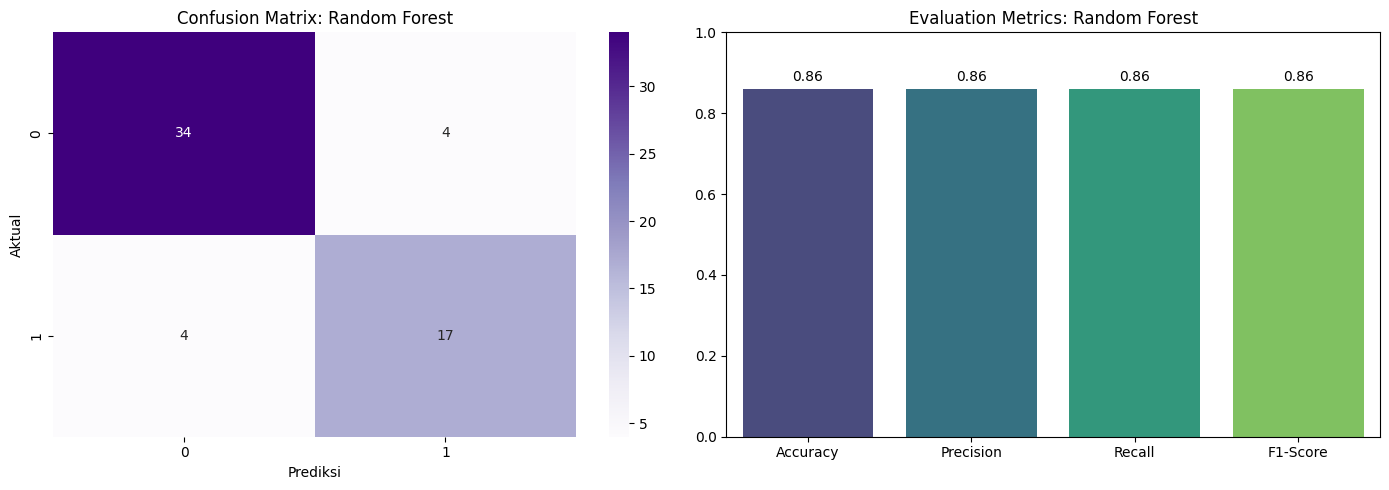

Hasil Klasifikasi Random Forest:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.81      0.81      0.81        21

    accuracy                           0.86        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.86      0.86      0.86        59



In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

evaluate_model(rf_model, "Random Forest", X_test, y_test, cmap="Purples")

C:\Users\jmjur\AppData\Local\Temp\ipykernel_32584\1721292980.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


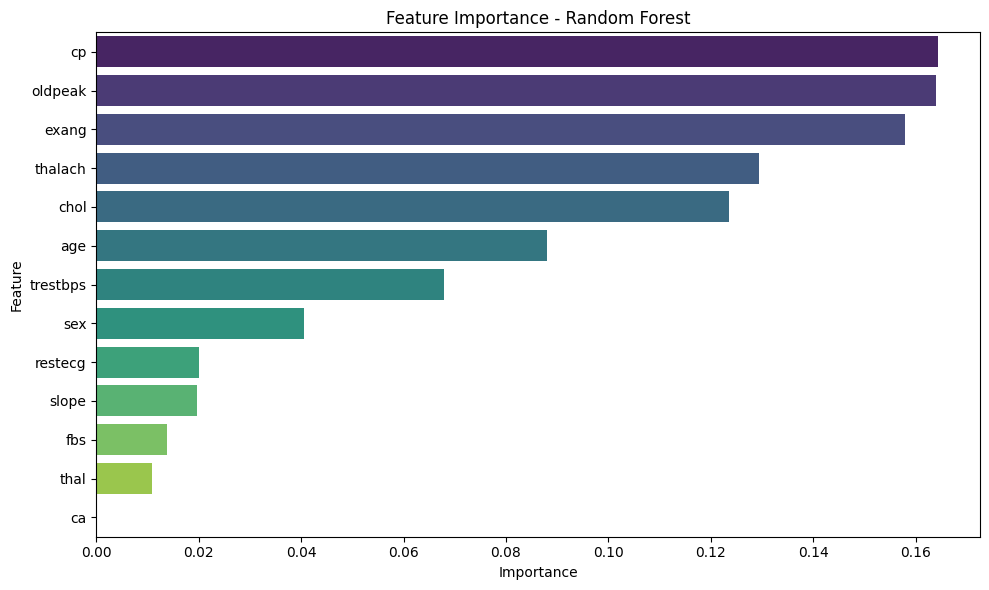

In [19]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

## Neural Network

c:\Users\jmjur\Documents\IPSD\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jmjur\AppData\Local\Temp\ipykernel_32584\2116788700.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_name, y=metrics_val, palette='viridis', ax=ax[1])


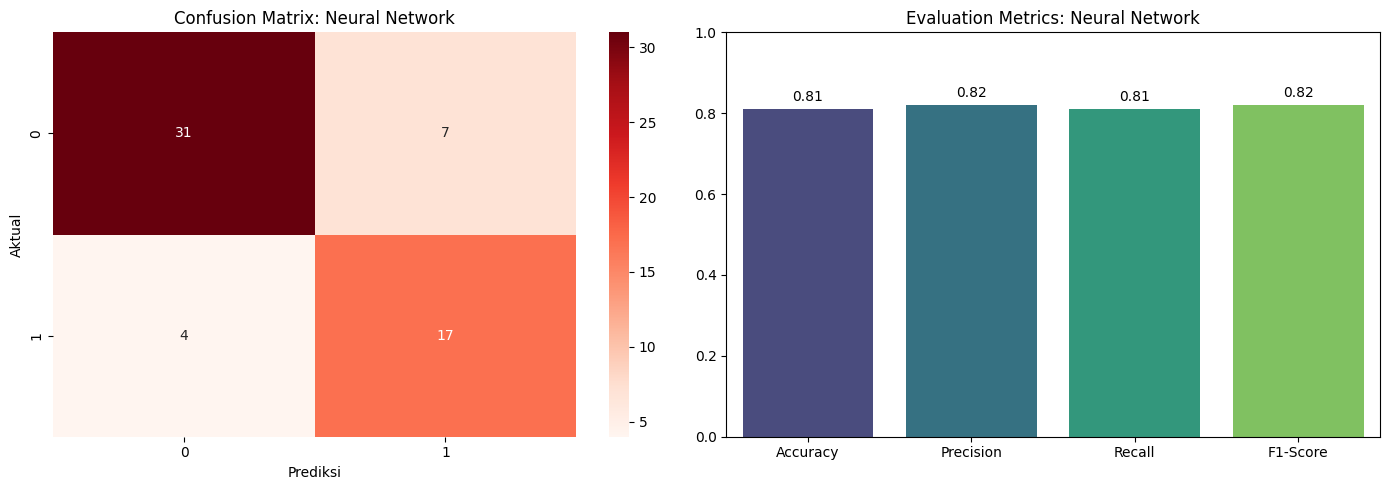

Hasil Klasifikasi Neural Network:

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        38
           1       0.71      0.81      0.76        21

    accuracy                           0.81        59
   macro avg       0.80      0.81      0.80        59
weighted avg       0.82      0.81      0.82        59



In [20]:
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=600, random_state=42)
nn_model.fit(X_train, y_train)

evaluate_model(nn_model, "Neural Network", X_test, y_test, cmap="Reds")

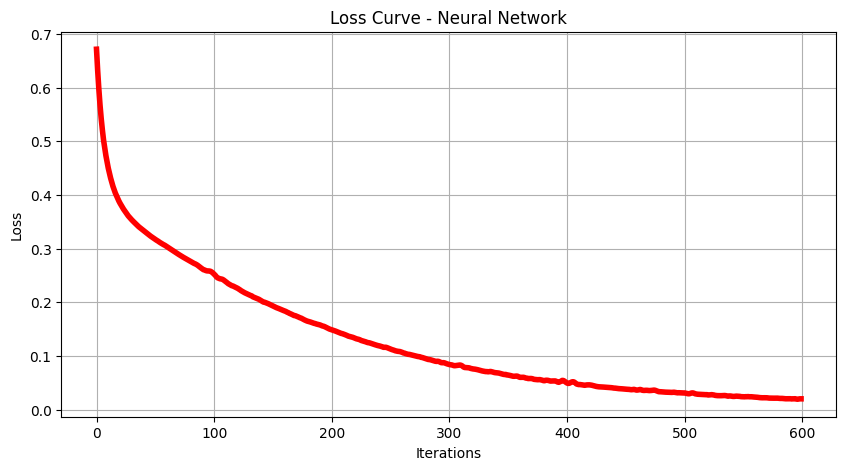

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(nn_model.loss_curve_, color='red', linewidth=4)
plt.title('Loss Curve - Neural Network')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Perbandingan Hasil Evaluasi Model

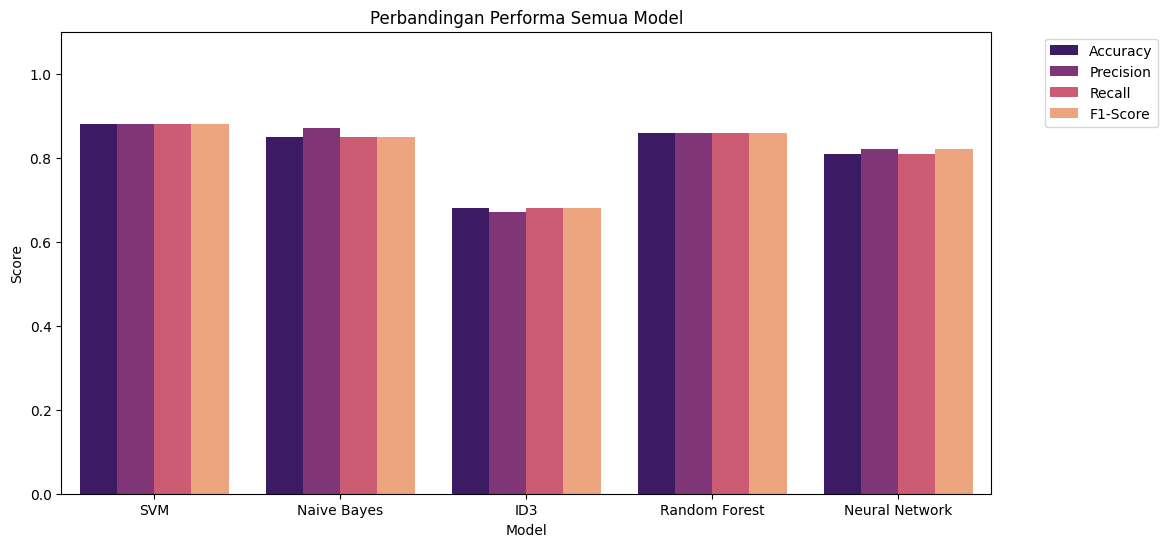

,Model,Accuracy,Precision,Recall,F1-Score
0,SVM,0.88,0.88,0.88,0.88
3,Random Forest,0.86,0.86,0.86,0.86
1,Naive Bayes,0.85,0.87,0.85,0.85
4,Neural Network,0.81,0.82,0.81,0.82
2,ID3,0.68,0.67,0.68,0.68


In [22]:
df_comparison = pd.DataFrame(all_results)

# Visualisasi perbandingan metrik antar model
df_melted = df_comparison.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='magma')
plt.title('Perbandingan Performa Semua Model')
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

df_comparison.sort_values(by='F1-Score', ascending=False)

# Kesimpulan

Berdasarkan hasil evaluasi, **Support Vector Machine (SVM)** terpilih sebagai model terbaik dengan akurasi 88%. Model ini menunjukkan keseimbangan yang baik antara precision dan recall.